# 0: Run this code block first

Otherwise, nothing else will work and you will just get a bunch of errors. You can run a code block by hilighting it and pressing `Shift+Enter`.

In [1]:
from modules import plot_selection, plot_mutation_selection

# 1: Moran process with two alleles from a single mutantion event

The code below simulates the moran process that we just discussed. Specifically, we have a population with 100 cells and there are two alleles, A and B. Initially, 99 of the cells are type A and 1 cell is type B (e.g. B is a newly arising mutation). Additionally, type A cells always have a growth rate of 1 and type B cells have a growth rate of $r$.

Play around with the parameter $r$ and keep the other settings the same for now.

Try  setting $r=1.0, 1.04, 1.08, \mathrm{and} \ 1.12$

and record the number of trials where the new allele B takes over the population in each of these cases. Later, we will combine all of our results together. To run the code, hilight the code block and press `Shift+Enter`.

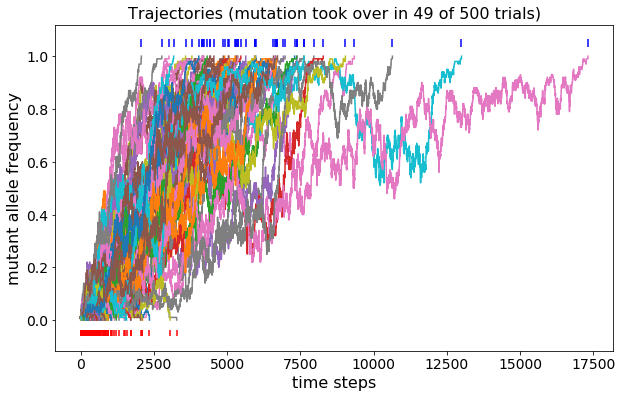

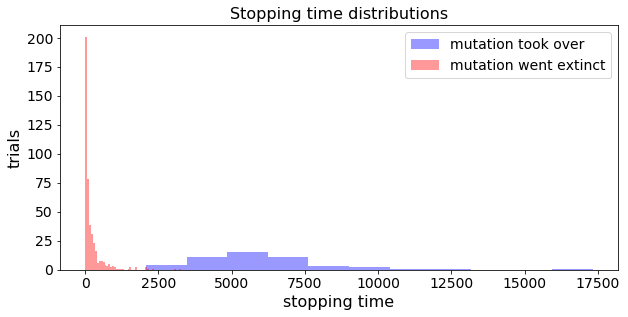

In [3]:
n_trials = 500
population_size = 100
initial_n_mutants = 1
r = 1.0
max_iter = 10 ** 5

plot_selection(n_trials, population_size, initial_n_mutants, r, max_iter)

## Discussion

* What do you notice about the relationship between $r$ and the fraction of mutations that take over the culture? Do most of the beneficial mutations in this simulation end up taking over the population? Discuss with your partners.

* The simulation runs until the mutant allele either takes over (i.e. achieves a frequency of 100%) or goes extinct. Once either of these two occurs, the simulation stops. Compare the stopping times of mutations that end up taking over versus mutations that go extinct. What do you see?

* If time allows: Try increasing $r$ above 1.12. How high does $r$ need to be in order to have the mutation take over half of the time?

# 2: Moran process with constant mutations

In this simulation, we will follow a population with two alleles: A, and B. The population will start out with 100% type A, but cells will at some frequecy mutate to type B. This is different from part (1) because in part (1), we initially had a frequency of 99% A and 1% B, but no mutations occurred during the simulation.

At each time step, each cell has a probability set by the parameter `mu` of suffering a mutation. Type B mutants grow 10% faster than nonmutant cells because `r=1.1`.

Run the code below. This section takes a couple minutes to run. Record the fraction of replicates in which the mutation roughly takes over (>80% frequency by the end).

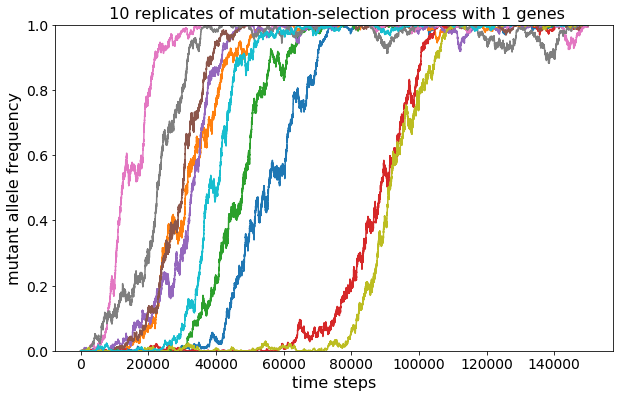

In [4]:
n_replicates = 10      # The number of independent replicates
n_genes = 1            # The number of genes undergoing mutation
mu = 10**-6            # The mutation rate (probability of muation per cell per allele per timestep)
pop_size = 500         # The population size
r = 1.1                # The fitness of mutants (nonmutants have fitness=1)
n_steps = 150000       # The number of timesteps to run the simulation

color=None
plot_mutation_selection(color, n_replicates, n_genes, mu, pop_size, r, n_steps)

## Discussion

How is this process different from the process in part (1)?

Write the fraction of times you saw the mutation take over on the board.

# 3: Moran process with mutations at multiple genes

This cell has the same settings as above, except now there are 5 genes, and we're only running a single replicate. That means that the different colors will represent mutants of different genes.

Set the random number seed to 1, so that we can all see the same dynamics. Later, you can play around with different random number seeds and different parameter values to see what happens.

Run the cell.


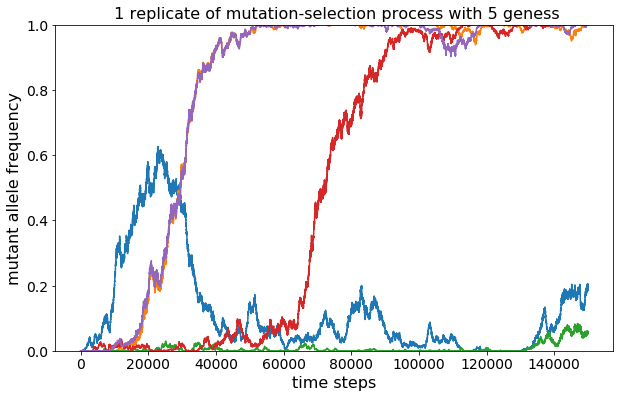

In [5]:
seed = 1               # The random number seed
n_replicates = 1       # The number of independent replicates
n_genes = 5            # The number of genes undergoing mutation
mu = 10**-6            # The mutation rate (probability of muation per cell per allele per timestep)
pop_size = 500         # The population size
r = 1.1                # The fitness of mutants (nonmutants have fitness=1)
n_steps = 150000       # The number of timesteps to run the simulation

color = None
plot_mutation_selection(color, n_replicates, n_genes, mu, pop_size, r, n_steps, seed)

## Discussion

* If you used `seed=1` above, you should see mutants at the blue gene rise to around 50% in frequency, and then fall back down to near-extinction. This behavior (almost) never happens when we only have one gene at a time (as in part 2), but in this case it is not unusual\*. What might be happening here\*\* ?

* If you used `seed=1` above, you should see the mutant frequencies at the blue and orange genes tracing each other. Why do you think this is?


```


```

\* I tried setting seed to 1 through 10 and saw it with seed = 1, 3, 4, 6, 7.

\** Hint: If you run the simulation with seed=7, then between 40000 and 70000 time steps the green and purple alleles appear to mirror each other. What does this suggest?
